<a href="https://colab.research.google.com/github/Took254312/workshop8/blob/main/Image%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install tensorflow

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from IPython.display import Image

In [58]:
import pathlib
path =  "drive/My Drive/Colab Notebooks/LyChy2" 
data_dir = pathlib.Path(path)

In [57]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

350


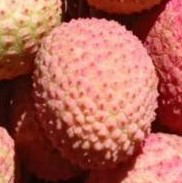

In [6]:
LychyC = list(data_dir.glob('LychyC/*')) 
PIL.Image.open(str(LychyC[53]))

In [7]:
batch_size = 32
img_height = 354
img_width = 400

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 350 files belonging to 5 classes.
Using 280 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 350 files belonging to 5 classes.
Using 70 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['LychyA', 'LychyAA', 'LychyB', 'LychyC', 'not found']


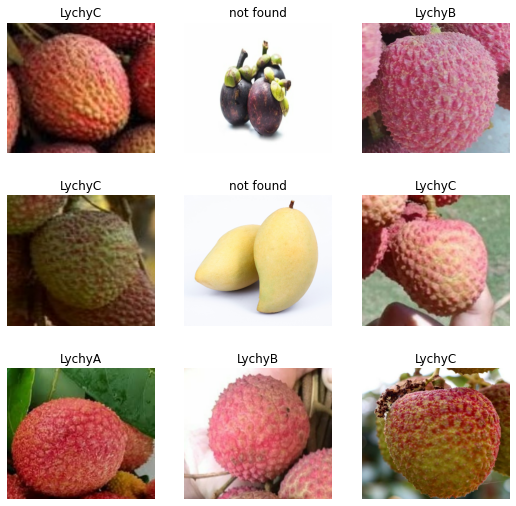

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
normalization_layer = layers.Rescaling(1./255)

In [13]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.00019909086 0.99436784


In [14]:
num_classes = 5
model = Sequential([
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)])

In [15]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 354, 400, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 354, 400, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 177, 200, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 177, 200, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 88, 100, 32)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 88, 100, 64)       1

In [17]:
epochs=10
history = model.fit(train_ds,
validation_data=val_ds,
epochs=epochs)

Epoch 1/10
9/9 [==============================] - 48s 5s/step - loss: 3.6116 - accuracy: 0.2321 - val_loss: 1.5779 - val_accuracy: 0.2429
Epoch 2/10
9/9 [==============================] - 46s 5s/step - loss: 1.4414 - accuracy: 0.3679 - val_loss: 1.4039 - val_accuracy: 0.3571
Epoch 3/10
9/9 [==============================] - 37s 4s/step - loss: 1.1392 - accuracy: 0.5107 - val_loss: 1.4204 - val_accuracy: 0.4429
Epoch 4/10
9/9 [==============================] - 37s 4s/step - loss: 0.9815 - accuracy: 0.5643 - val_loss: 1.1986 - val_accuracy: 0.5143
Epoch 5/10
9/9 [==============================] - 37s 4s/step - loss: 0.7441 - accuracy: 0.6821 - val_loss: 1.3718 - val_accuracy: 0.4857
Epoch 6/10
9/9 [==============================] - 37s 4s/step - loss: 0.6040 - accuracy: 0.7750 - val_loss: 1.4020 - val_accuracy: 0.5429
Epoch 7/10
9/9 [==============================] - 37s 4s/step - loss: 0.4732 - accuracy: 0.8250 - val_loss: 1.4132 - val_accuracy: 0.5000
Epoch 8/10
9/9 [==================

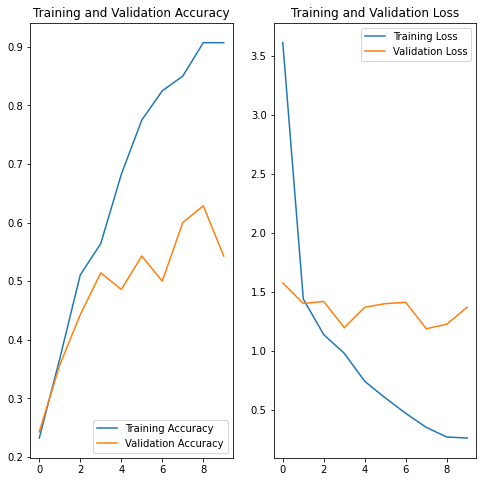

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

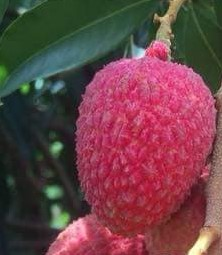

This image most likely belongs to LychyAA with a 99.23 percent confidence.


In [19]:
path = "/content/drive/My Drive/Colab Notebooks/LyChy2/LychyAA/LychyAA65.jpg"
img = keras.preprocessing.image.load_img(
path, target_size=(img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print(
"This image most likely belongs to {} with a {:.2f} percent confidence."
.format(class_names[np.argmax(score)], 100 * np.max(score)))

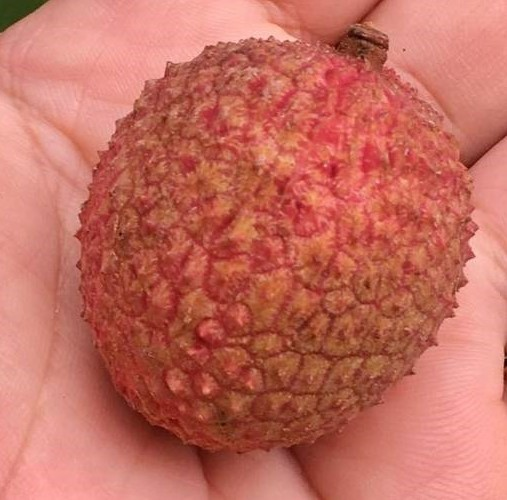

This image most likely belongs to LychyA with a 94.64 percent confidence.


In [20]:
path = "/content/drive/My Drive/Colab Notebooks/LyChy2/LychyA/LychyA65.jpg"
img = keras.preprocessing.image.load_img(
path, target_size=(img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print(
"This image most likely belongs to {} with a {:.2f} percent confidence."
.format(class_names[np.argmax(score)], 100 * np.max(score)))

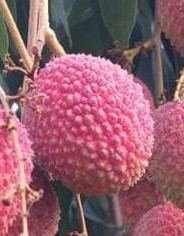

This image most likely belongs to LychyB with a 96.91 percent confidence.


In [21]:
path = "/content/drive/My Drive/Colab Notebooks/LyChy2/LychyB/LychyB52.jpg"
img = keras.preprocessing.image.load_img(
path, target_size=(img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print(
"This image most likely belongs to {} with a {:.2f} percent confidence."
.format(class_names[np.argmax(score)], 100 * np.max(score)))

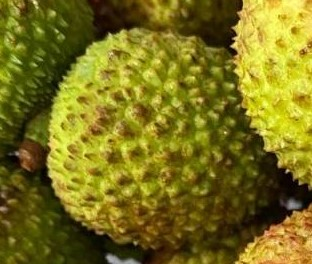

This image most likely belongs to LychyC with a 99.99 percent confidence.


In [22]:
path = "/content/drive/My Drive/Colab Notebooks/LyChy2/LychyC/LychyC54.jpg"
img = keras.preprocessing.image.load_img(
path, target_size=(img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print(
"This image most likely belongs to {} with a {:.2f} percent confidence."
.format(class_names[np.argmax(score)], 100 * np.max(score)))

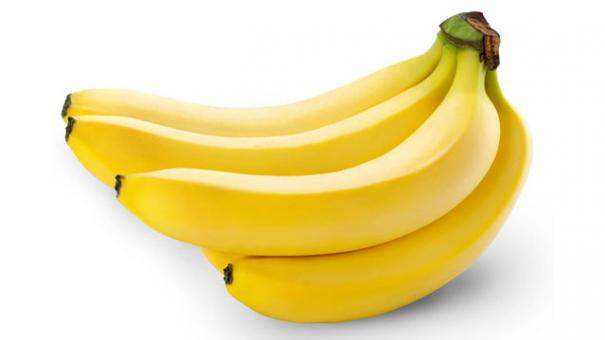

This image most likely belongs to not found with a 99.99 percent confidence.


In [24]:
path = "/content/drive/My Drive/Colab Notebooks/LyChy2/not found/A3.jpg"
img = keras.preprocessing.image.load_img(
path, target_size=(img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print(
"This image most likely belongs to {} with a {:.2f} percent confidence."
.format(class_names[np.argmax(score)], 100 * np.max(score)))